# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

In [ ]:
costs 必须 大于等于0

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

In [ ]:
不会

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

需要最优化 - BFS
假如不需要最优化，时间复杂度是一样的；空间复杂度 BFS = O(b^d); DFS = O(d*d)

##### 2.4 When can we use machine learning ?

In [ ]:
程序自动优化

##### 2.5 What is the gradient of a function ?

In [ ]:
找到损失最少的函数

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

In [ ]:
用偏导导数

#### 3. 实践部分  寻找地铁路线

In [ ]:
http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv
    

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [1]:
import requests
r = requests.get('https://exploreshanghai.com/ditie/')
with open(r'c:\temp\tt.txt','w',encoding='utf-8') as f:
    f.write(r.content.decode())
print (r.content.decode())

<!DOCTYPE html>
<html>
<head>
		<title>ExploreShanghai | 上海地铁地图 | 上海轨道交通图 | ExploreShanghai</title>
		<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
	<meta name="msapplication-config" content="/browserconfig.xml" />
	<meta name="application-name" content="ExploreShanghai"/>
	<link href="//static.exploremetro.com/css/new.css?295071" rel="stylesheet" type="text/css" />
		<link rel="icon" href="https://static.exploremetro.com/ico/favicon.ico" type="image/x-icon" />
	<meta name="viewport" content="width=device-width, minimum-scale=1, maximum-scale=1" />
	<meta name="apple-mobile-web-app-capable" content="yes" />
	<!--[if lt IE 9]>
	<script src="//static.exploremetro.com/js/respond.min.js"></script>
	<link href="//static.exploremetro.com/js/respond-proxy.html" id="respond-proxy" rel="respond-proxy" />
	<link href="/cross-domain/respond.proxy.gif" id="respond-redirect" rel="respond-redirect" />
	<script src="/cross-domain/respond.proxy.js"></script>
	
	<script src="//s

In [3]:
import ast
from selectolax.parser import HTMLParser
with open(r'c:\temp\tt.txt', 'r',encoding='utf-8') as content_file:
    html = content_file.read()
selector = "li"
i=0
city_info = {}
for node in HTMLParser(html).css(selector):
    if 'data-station' in node.attributes:
        mydic = ast.literal_eval(node.attributes['data-station'])
        x_y = tuple(k/1 for k in map(float,(mydic['x'],mydic['y'])))
        city_info[node.text() ] = x_y
print (city_info)

{'龙阳路': (118332799.0, -3112678.0), '世纪大道': (103967079.0, 17918666.0), '徐家汇': (36317368.0, 7495912.0), '陕西南路': (59558087.0, 16000991.0), '人民广场': (74343442.0, 27499036.0), '汉中路': (64741687.0, 36635851.0), '上海火车站': (60842953.0, 43255871.0), '中山公园': (27607698.0, 27497476.0), '南京西路': (59628987.0, 27528821.0), '宜山路': (27676938.0, 7895912.0), '虹桥路': (27607698.0, 14978726.0), '金沙江路': (27607698.0, 36829116.0), '曹杨路': (28184653.0, 43782435.0), '镇坪路': (40845687.0, 43782435.0), '虹桥火车站': (-42255972.0, 21438881.0), '东方体育中心': (56833287.0, -42082899.0), '莘庄': (1240708.0, -42935534.0), '上海南站': (23104868.0, -20912684.0), '漕宝路': (23115218.0, -11347254.0), '上海体育馆': (33169222.0, 3645911.0), '常熟路': (47586412.0, 16943181.0), '江苏路': (36061997.0, 27497181.0), '静安寺': (46886412.0, 27480091.0), '南京东路': (88412776.0, 27528821.0), '龙漕路': (30612388.0, -11206819.0), '延安西路': (27607698.0, 21736536.0), '中潭路': (49474887.0, 43782435.0), '宝山路': (71090607.0, 43782435.0), '虹口足球场': (90136994.0, 58266588.0), '华夏中路': (118333126.

In [4]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

In [5]:
get_city_distance("外环路","莘庄")

16123.26436340559

In [6]:
import ast
from selectolax.parser import HTMLParser
with open(r'c:\temp\tt.txt', 'r',encoding='utf-8') as content_file:
    html = content_file.read()
selector = "li"
rails = {}
for node in HTMLParser(html).css(selector):
    if 'data-station' in node.attributes:
        mydic = ast.literal_eval(node.attributes['data-station'])
        i = -1
        for line in mydic['lines']:
            i += 1
            if not line in rails: rails[line] = []
            id = mydic['exploreid'].split(',')[i]
#             if len(id) > 2 : id = id[-2:]
            id = int(id)
            rails[line].append([node.text(),id])

In [7]:
for k in rails:
    print (k,sorted(rails[k],key = lambda x: x[1]))

2 [['中山公园', 27], ['江苏路', 28], ['静安寺', 29], ['南京西路', 30], ['人民广场', 31], ['南京东路', 32], ['陆家嘴', 33], ['东昌路', 34], ['上海科技馆', 35], ['世纪公园', 36], ['龙阳路', 37], ['张江高科', 38], ['世纪大道', 91], ['淞虹路', 94], ['北新泾', 95], ['威宁路', 96], ['娄山关路', 97], ['金科路', 201], ['广兰路', 202], ['唐镇', 203], ['创新中路', 204], ['华夏东路', 205], ['川沙', 206], ['凌空路', 207], ['远东大道', 208], ['海天三路', 209], ['浦东国际机场', 210], ['虹桥2号航站楼', 297], ['虹桥火车站', 298], ['徐泾东', 299]]
7 [['花木路', 701], ['龙阳路', 702], ['芳华路', 703], ['锦绣路', 704], ['杨高南路', 705], ['高科西路', 706], ['云台路', 707], ['耀华路', 708], ['长清路', 709], ['后滩', 710], ['龙华中路', 711], ['东安路', 712], ['肇嘉浜路', 713], ['常熟路', 714], ['静安寺', 715], ['昌平路', 716], ['长寿路', 717], ['镇坪路', 718], ['岚皋路', 719], ['新村路', 720], ['大华三路', 721], ['行知路', 722], ['大场镇', 723], ['场中路', 724], ['上大路', 725], ['南陈路', 726], ['上海大学', 727], ['祁华路', 728], ['顾村公园', 729], ['刘行', 730], ['潘广路', 731], ['罗南新村', 732], ['美兰湖', 733]]
S [['龙阳路', 1601], ['华夏中路', 1602], ['罗山路', 1603], ['周浦东', 1604], ['鹤沙航城', 1605], ['航头东', 1606], ['新场', 

In [10]:
from collections import defaultdict
def build_connection(rails):
    cities_connection = defaultdict(list)
    for k in rails:
#         if k == '2':
            if k == '2': 
                for line in rails[k]:
                    if line[1] > 200: line[1] = line[1] -200
            rails[k] = sorted(rails[k],key = lambda x: x[1])
            print (rails[k])
            for i in range(len(rails[k])-1):
                cities_connection[rails[k][i][0]].append(rails[k][i+1][0])
    return cities_connection

cities_connection = build_connection(rails)

[['金科路', 1], ['广兰路', 2], ['唐镇', 3], ['创新中路', 4], ['华夏东路', 5], ['川沙', 6], ['凌空路', 7], ['远东大道', 8], ['海天三路', 9], ['浦东国际机场', 10], ['中山公园', 27], ['江苏路', 28], ['静安寺', 29], ['南京西路', 30], ['人民广场', 31], ['南京东路', 32], ['陆家嘴', 33], ['东昌路', 34], ['上海科技馆', 35], ['世纪公园', 36], ['龙阳路', 37], ['张江高科', 38], ['世纪大道', 91], ['淞虹路', 94], ['北新泾', 95], ['威宁路', 96], ['虹桥2号航站楼', 97], ['娄山关路', 97], ['虹桥火车站', 98], ['徐泾东', 99]]
[['花木路', 701], ['龙阳路', 702], ['芳华路', 703], ['锦绣路', 704], ['杨高南路', 705], ['高科西路', 706], ['云台路', 707], ['耀华路', 708], ['长清路', 709], ['后滩', 710], ['龙华中路', 711], ['东安路', 712], ['肇嘉浜路', 713], ['常熟路', 714], ['静安寺', 715], ['昌平路', 716], ['长寿路', 717], ['镇坪路', 718], ['岚皋路', 719], ['新村路', 720], ['大华三路', 721], ['行知路', 722], ['大场镇', 723], ['场中路', 724], ['上大路', 725], ['南陈路', 726], ['上海大学', 727], ['祁华路', 728], ['顾村公园', 729], ['刘行', 730], ['潘广路', 731], ['罗南新村', 732], ['美兰湖', 733]]
[['龙阳路', 1601], ['华夏中路', 1602], ['罗山路', 1603], ['周浦东', 1604], ['鹤沙航城', 1605], ['航头东', 1606], ['新场', 1607], ['野生动物园', 1608], ['惠南

In [11]:
import matplotlib as mpl
from matplotlib.font_manager import _rebuild
_rebuild()

mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
cities_connection_graph = nx.Graph(cities_connection)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


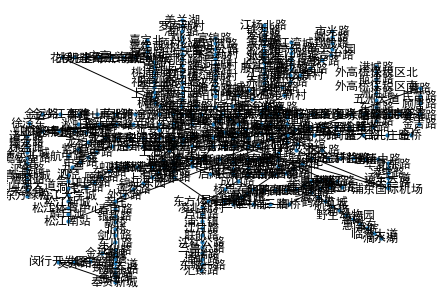

In [14]:
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)

In [15]:
def search_1(graph,start,destination):
    pathes = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  #提取第一条路径
        froniter = path[-1]   #提取即将要探索的节点
        
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
            
        successsors = graph[froniter]
        
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path
        visited.add(froniter)

In [16]:
search_1(cities_connection,"龙阳路","虹桥火车站")

['龙阳路', '张江高科', '世纪大道', '淞虹路', '北新泾', '威宁路', '虹桥2号航站楼', '虹桥火车站']

In [ ]:
由于获得的数据不规范，所以结果不准确

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 